In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# To build linear regression_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# To check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
df = pd.read_csv("cubic_zirconia (3).csv")

In [3]:
df.head(10)

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779
5,6,1.02,Ideal,D,VS2,61.5,56.0,6.46,6.49,3.99,9502
6,7,1.01,Good,H,SI1,63.7,60.0,6.35,6.30,4.03,4836
7,8,0.50,Premium,E,SI1,61.5,62.0,5.09,5.06,3.12,1415
8,9,1.21,Good,H,SI1,63.8,64.0,6.72,6.63,4.26,5407
9,10,0.35,Ideal,F,VS2,60.5,57.0,4.52,4.60,2.76,706


In [4]:
df.drop(['Unnamed: 0'], axis= 1, inplace= True)

In [5]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [6]:
df.duplicated().sum()

34

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.duplicated().sum()

0

In [9]:
df.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

In [10]:
df.isin([0]).sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          2
y          2
z          8
price      0
dtype: int64

In [11]:
df.fillna(value=df['depth']. mean(), inplace=True)

In [12]:
df['x']=df['x'].replace({0:df['x'].mean()})

In [13]:
df['y']=df['y'].replace({0:df['y'].mean()})

In [14]:
df['z']=df['z'].replace({0:df['z'].mean()})

In [15]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [16]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [17]:
df.shape

(26933, 10)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26933 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26933 non-null  float64
 1   cut      26933 non-null  object 
 2   color    26933 non-null  object 
 3   clarity  26933 non-null  object 
 4   depth    26933 non-null  float64
 5   table    26933 non-null  float64
 6   x        26933 non-null  float64
 7   y        26933 non-null  float64
 8   z        26933 non-null  float64
 9   price    26933 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.3+ MB


In [19]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

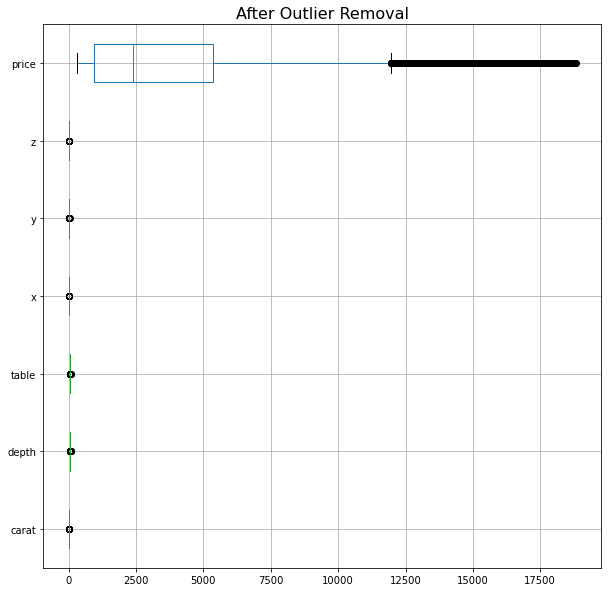

In [20]:
plt.figure(figsize=(10,10))
df.boxplot(vert=0)
plt.title('After Outlier Removal',fontsize=16)
plt.show()

In [21]:
df = pd.get_dummies(df, columns=['cut','clarity','color'],drop_first=True)

In [22]:
df.head()

,carat,depth,table,x,y,z,price,cut_Good,cut_Ideal,cut_Premium,...,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,color_E,color_F,color_G,color_H,color_I,color_J
0,0.30,62.1,58.0,4.27,4.29,2.66,499,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,0.33,60.8,58.0,4.42,4.46,2.70,984,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2,0.90,62.2,60.0,6.04,6.12,3.78,6289,0,0,0,...,0,0,0,1,1,0,0,0,0,0
3,0.42,61.6,56.0,4.82,4.80,2.96,1082,0,1,0,...,1,0,0,0,0,1,0,0,0,0
4,0.31,60.4,59.0,4.35,4.43,2.65,779,0,1,0,...,0,0,1,0,0,1,0,0,0,0


In [23]:
# Copy all the predictor variables into X dataframe
X = df.drop('price', axis=1)

# Copy target into the y dataframe. 
y = df[['price']]

In [24]:
X = sm.add_constant(X)

C:\Users\Honey Sam\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [25]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=1
)

In [26]:
print(X_train.head())

       const  carat  depth  table     x     y     z  cut_Good  cut_Ideal  \
22114    1.0   0.34   62.4   60.0  4.41  4.44  2.76         0          0   
2275     1.0   0.30   61.2   55.0  4.35  4.31  2.65         0          1   
19183    1.0   0.50   62.5   57.0  5.09  5.05  3.17         0          1   
5030     1.0   1.10   63.3   56.0  6.53  6.58  4.15         1          0   
25414    1.0   1.02   61.1   62.0  6.54  6.49  3.98         0          0   

       cut_Premium  ...  clarity_VS1  clarity_VS2  clarity_VVS1  clarity_VVS2  \
22114            0  ...            0            1             0             0   
2275             0  ...            0            1             0             0   
19183            0  ...            0            0             0             0   
5030             0  ...            0            0             0             0   
25414            1  ...            0            0             0             0   

       color_E  color_F  color_G  color_H  color_I  colo

In [27]:
print(X_test.head())

       const  carat  depth  table     x     y     z  cut_Good  cut_Ideal  \
16997    1.0   1.26   60.5   62.0  6.97  6.92  4.20         0          0   
24457    1.0   0.90   58.5   59.0  6.35  6.36  3.72         0          0   
16612    1.0   1.37   59.6   57.0  7.28  7.22  4.32         0          1   
308      1.0   0.84   63.6   57.0  5.98  5.93  3.79         1          0   
26652    1.0   2.00   60.8   62.0  8.09  8.12  4.93         0          0   

       cut_Premium  ...  clarity_VS1  clarity_VS2  clarity_VVS1  clarity_VVS2  \
16997            1  ...            0            0             0             0   
24457            0  ...            0            1             0             0   
16612            0  ...            1            0             0             0   
308              0  ...            1            0             0             0   
26652            0  ...            0            1             0             0   

       color_E  color_F  color_G  color_H  color_I  colo

In [28]:
olsmod = sm.OLS(y_train, X_train)
olsres = olsmod.fit()

In [29]:
# let's print the regression summary
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     9483.
Date:                Sun, 09 Oct 2022   Prob (F-statistic):               0.00
Time:                        23:25:55   Log-Likelihood:            -1.5929e+05
No. Observations:               18853   AIC:                         3.186e+05
Df Residuals:                   18829   BIC:                         3.188e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          3240.5798    693.098      4.676

### Interpretation of R-squared

* The R-squared value tells us that our model can explain 92.3% of the variance in the training set.

### Interpretation of Coefficients 

Carat has a positive correlation with price. P values cannot be trusted due to high multi collinearity in the dataset. 

### Checking Variance Inflation factor of variables

Checking variance inflation of variables to check degree of multi collinearity. It should be close to 1 or below 10 for reduced multi collinearity. Or else if it has extreme significance on the adjusted square, perhaps we will try other attributes. 

In [30]:
vif_series1 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series1))

VIF values: 

const            7080.267488
carat              25.718176
depth               1.586960
table               1.788295
x                  42.057477
y                  10.112259
z                  11.613816
cut_Good            4.064779
cut_Ideal          11.975313
cut_Premium         8.841796
cut_Very Good       8.060362
clarity_IF          3.602014
clarity_SI1        15.512642
clarity_SI2        12.020762
clarity_VS1        11.293492
clarity_VS2        14.788276
clarity_VVS1        6.297285
clarity_VVS2        7.932911
color_E             2.046554
color_F             2.010049
color_G             2.227058
color_H             1.960533
color_I             1.739373
color_J             1.432934
dtype: float64



To treat multicollinearity, we will have to drop one or more of the correlated features.

We will drop the variable that has the least impact on the adjusted R-squared of the model.

In [31]:
X_train2 = X_train.drop(["carat"], axis=1)
olsmod_1 = sm.OLS(y_train, X_train2)
olsres_1 = olsmod_1.fit()
print(
    "R-squared:",
    np.round(olsres_1.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_1.rsquared_adj, 3),
)

R-squared: 0.847 
Adjusted R-squared: 0.847


When carat is dropped, we can observe that there is a significant drop in the adjusted square. therefore we will not be dropping the carat variable for our model. we shall try other variables which have the least impact on the adjusted R-sqaured of the model. 

Other variables that we're gonna try to test out and check the adjusted R square: X, y, z, cut Ideal, Clarity SI1, Clarity SI2,Clarity VS 2. 

In [32]:
X_train3 = X_train.drop(["x"], axis=1)
olsmod_2 = sm.OLS(y_train, X_train3)
olsres_2 = olsmod_2.fit()
print(
    "R-squared:",
    np.round(olsres_2.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_2.rsquared_adj, 3),
)

R-squared: 0.918 
Adjusted R-squared: 0.918


In [33]:
X_train4 = X_train.drop(["y"], axis=1)
olsmod_3 = sm.OLS(y_train, X_train4)
olsres_3 = olsmod_3.fit()
print(
    "R-squared:",
    np.round(olsres_3.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_3.rsquared_adj, 3),
)

R-squared: 0.921 
Adjusted R-squared: 0.92


In [34]:
X_train5 = X_train.drop(["z"], axis=1)
olsmod_4 = sm.OLS(y_train, X_train5)
olsres_4 = olsmod_4.fit()
print(
    "R-squared:",
    np.round(olsres_4.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_4.rsquared_adj, 3),
)

R-squared: 0.921 
Adjusted R-squared: 0.92


In [35]:
X_train6 = X_train.drop(["cut_Ideal"], axis=1)
olsmod_5 = sm.OLS(y_train, X_train6)
olsres_5 = olsmod_5.fit()
print(
    "R-squared:",
    np.round(olsres_5.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_5.rsquared_adj, 3),
)

R-squared: 0.92 
Adjusted R-squared: 0.92


In [36]:
X_train7 = X_train.drop(["clarity_SI1"], axis=1)
olsmod_6 = sm.OLS(y_train, X_train7)
olsres_6 = olsmod_6.fit()
print(
    "R-squared:",
    np.round(olsres_6.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_6.rsquared_adj, 3),
)

R-squared: 0.911 
Adjusted R-squared: 0.911


In [37]:
X_train8 = X_train.drop(["clarity_SI2"], axis=1)
olsmod_7 = sm.OLS(y_train, X_train8)
olsres_7 = olsmod_7.fit()
print(
    "R-squared:",
    np.round(olsres_7.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_7.rsquared_adj, 3),
)

R-squared: 0.916 
Adjusted R-squared: 0.916


In [38]:
X_train9 = X_train.drop(["clarity_VS2"], axis=1)
olsmod_8 = sm.OLS(y_train, X_train9)
olsres_8 = olsmod_8.fit()
print(
    "R-squared:",
    np.round(olsres_8.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_8.rsquared_adj, 3),
)

R-squared: 0.908 
Adjusted R-squared: 0.908


Dropping columns which have no impact on the adjusted R square and R square

In [39]:
X_train = X_train.drop(["x","y","z"], axis=1)

In [40]:
olsmod_9 = sm.OLS(y_train, X_train)
olsres_9 = olsmod_9.fit()
print(olsres_9.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                 1.031e+04
Date:                Sun, 09 Oct 2022   Prob (F-statistic):               0.00
Time:                        23:25:56   Log-Likelihood:            -1.5978e+05
No. Observations:               18853   AIC:                         3.196e+05
Df Residuals:                   18832   BIC:                         3.198e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -4576.1418    647.934     -7.063

In [41]:
vif_series2 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series2))

VIF values: 

const            5877.765198
carat               1.319924
depth               1.364736
table               1.786583
cut_Good            4.060201
cut_Ideal          11.957399
cut_Premium         8.829943
cut_Very Good       8.039928
clarity_IF          3.597736
clarity_SI1        15.494636
clarity_SI2        12.010216
clarity_VS1        11.290767
clarity_VS2        14.784086
clarity_VVS1        6.288787
clarity_VVS2        7.931006
color_E             2.046239
color_F             2.007566
color_G             2.224593
color_H             1.960407
color_I             1.738461
color_J             1.431057
dtype: float64



Carat variance inflation,  depth and table inflation has come down significatntly. We shall now try dropping cut_Ideal, clarity_SI1, clarity_SI2 and clarity_VS2 from this model and check the results. 

In [42]:
X_train10 = X_train.drop(["cut_Ideal"], axis=1)
olsmod_9 = sm.OLS(y_train, X_train10)
olsres_9 = olsmod_9.fit()
print(
    "R-squared:",
    np.round(olsres_9.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_9.rsquared_adj, 3),
)

R-squared: 0.915 
Adjusted R-squared: 0.915


In [43]:
X_train11 = X_train.drop(["clarity_SI1"], axis=1)
olsmod_10 = sm.OLS(y_train, X_train11)
olsres_10 = olsmod_10.fit()
print(
    "R-squared:",
    np.round(olsres_10.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_10.rsquared_adj, 3),
)

R-squared: 0.908 
Adjusted R-squared: 0.908


In [44]:
X_train12 = X_train.drop(["clarity_SI2"], axis=1)
olsmod_11 = sm.OLS(y_train, X_train12)
olsres_11 = olsmod_11.fit()
print(
    "R-squared:",
    np.round(olsres_11.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_11.rsquared_adj, 3),
)

R-squared: 0.912 
Adjusted R-squared: 0.912


In [45]:
X_train13 = X_train.drop(["clarity_VS2"], axis=1)
olsmod_12 = sm.OLS(y_train, X_train13)
olsres_12 = olsmod_12.fit()
print(
    "R-squared:",
    np.round(olsres_12.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_12.rsquared_adj, 3),
)

R-squared: 0.904 
Adjusted R-squared: 0.904


In [46]:
X_train = X_train.drop(["cut_Ideal","clarity_SI2"], axis=1)

In [47]:
olsmod_13 = sm.OLS(y_train, X_train)
olsres_13 = olsmod_13.fit()
print(olsres_13.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                 1.065e+04
Date:                Sun, 09 Oct 2022   Prob (F-statistic):               0.00
Time:                        23:25:57   Log-Likelihood:            -1.6041e+05
No. Observations:               18853   AIC:                         3.209e+05
Df Residuals:                   18834   BIC:                         3.210e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          4062.1664    572.386      7.097

In [48]:
vif_series4 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("Series before feature selection: \n\n{}\n".format(vif_series4))

Series before feature selection: 

const            4291.100331
carat               1.317936
depth               1.180485
table               1.528321
cut_Good            1.308960
cut_Premium         1.539513
cut_Very Good       1.348677
clarity_IF          1.232258
clarity_SI1         1.826499
clarity_VS1         1.676962
clarity_VS2         1.838968
clarity_VVS1        1.434637
clarity_VVS2        1.507216
color_E             2.045917
color_F             2.005836
color_G             2.224039
color_H             1.959922
color_I             1.738153
color_J             1.430733
dtype: float64



In [49]:
X_train = X_train.drop(["cut_Premium"], axis=1)
olsmod_14 = sm.OLS(y_train, X_train)
olsres_14 = olsmod_14.fit()
print(olsres_14.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                 1.128e+04
Date:                Sun, 09 Oct 2022   Prob (F-statistic):               0.00
Time:                        23:25:58   Log-Likelihood:            -1.6041e+05
No. Observations:               18853   AIC:                         3.209e+05
Df Residuals:                   18835   BIC:                         3.210e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          3907.0850    563.857      6.929

In [50]:
vif_series5 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("Series before feature selection: \n\n{}\n".format(vif_series5))

Series before feature selection: 

const            4163.843215
carat               1.316622
depth               1.180042
table               1.260042
cut_Good            1.136330
cut_Very Good       1.071436
clarity_IF          1.228932
clarity_SI1         1.826365
clarity_VS1         1.676189
clarity_VS2         1.838943
clarity_VVS1        1.430469
clarity_VVS2        1.501988
color_E             2.045917
color_F             2.005636
color_G             2.223200
color_H             1.959022
color_I             1.738147
color_J             1.430724
dtype: float64



In [51]:
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train.values.flatten()  # actual values
df_pred["Fitted Values"] = olsres_14.fittedvalues.values  # predicted values
df_pred["Residuals"] = olsres_14.resid.values  # residuals

df_pred.head()


,Actual Values,Fitted Values,Residuals
0,537,-407.807723,944.807723
1,844,402.876769,441.123231
2,1240,990.512484,249.487516
3,4065,5402.151345,-1337.151345
4,4057,4466.068496,-409.068496


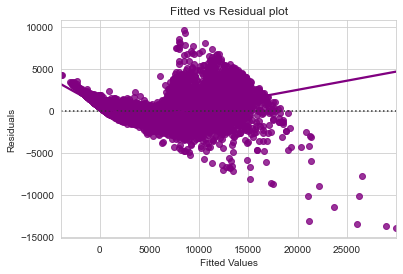

In [52]:
sns.set_style("whitegrid")
sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

In [53]:
X_train.columns

Index(['const', 'carat', 'depth', 'table', 'cut_Good', 'cut_Very Good',
       'clarity_IF', 'clarity_SI1', 'clarity_VS1', 'clarity_VS2',
       'clarity_VVS1', 'clarity_VVS2', 'color_E', 'color_F', 'color_G',
       'color_H', 'color_I', 'color_J'],
      dtype='object')

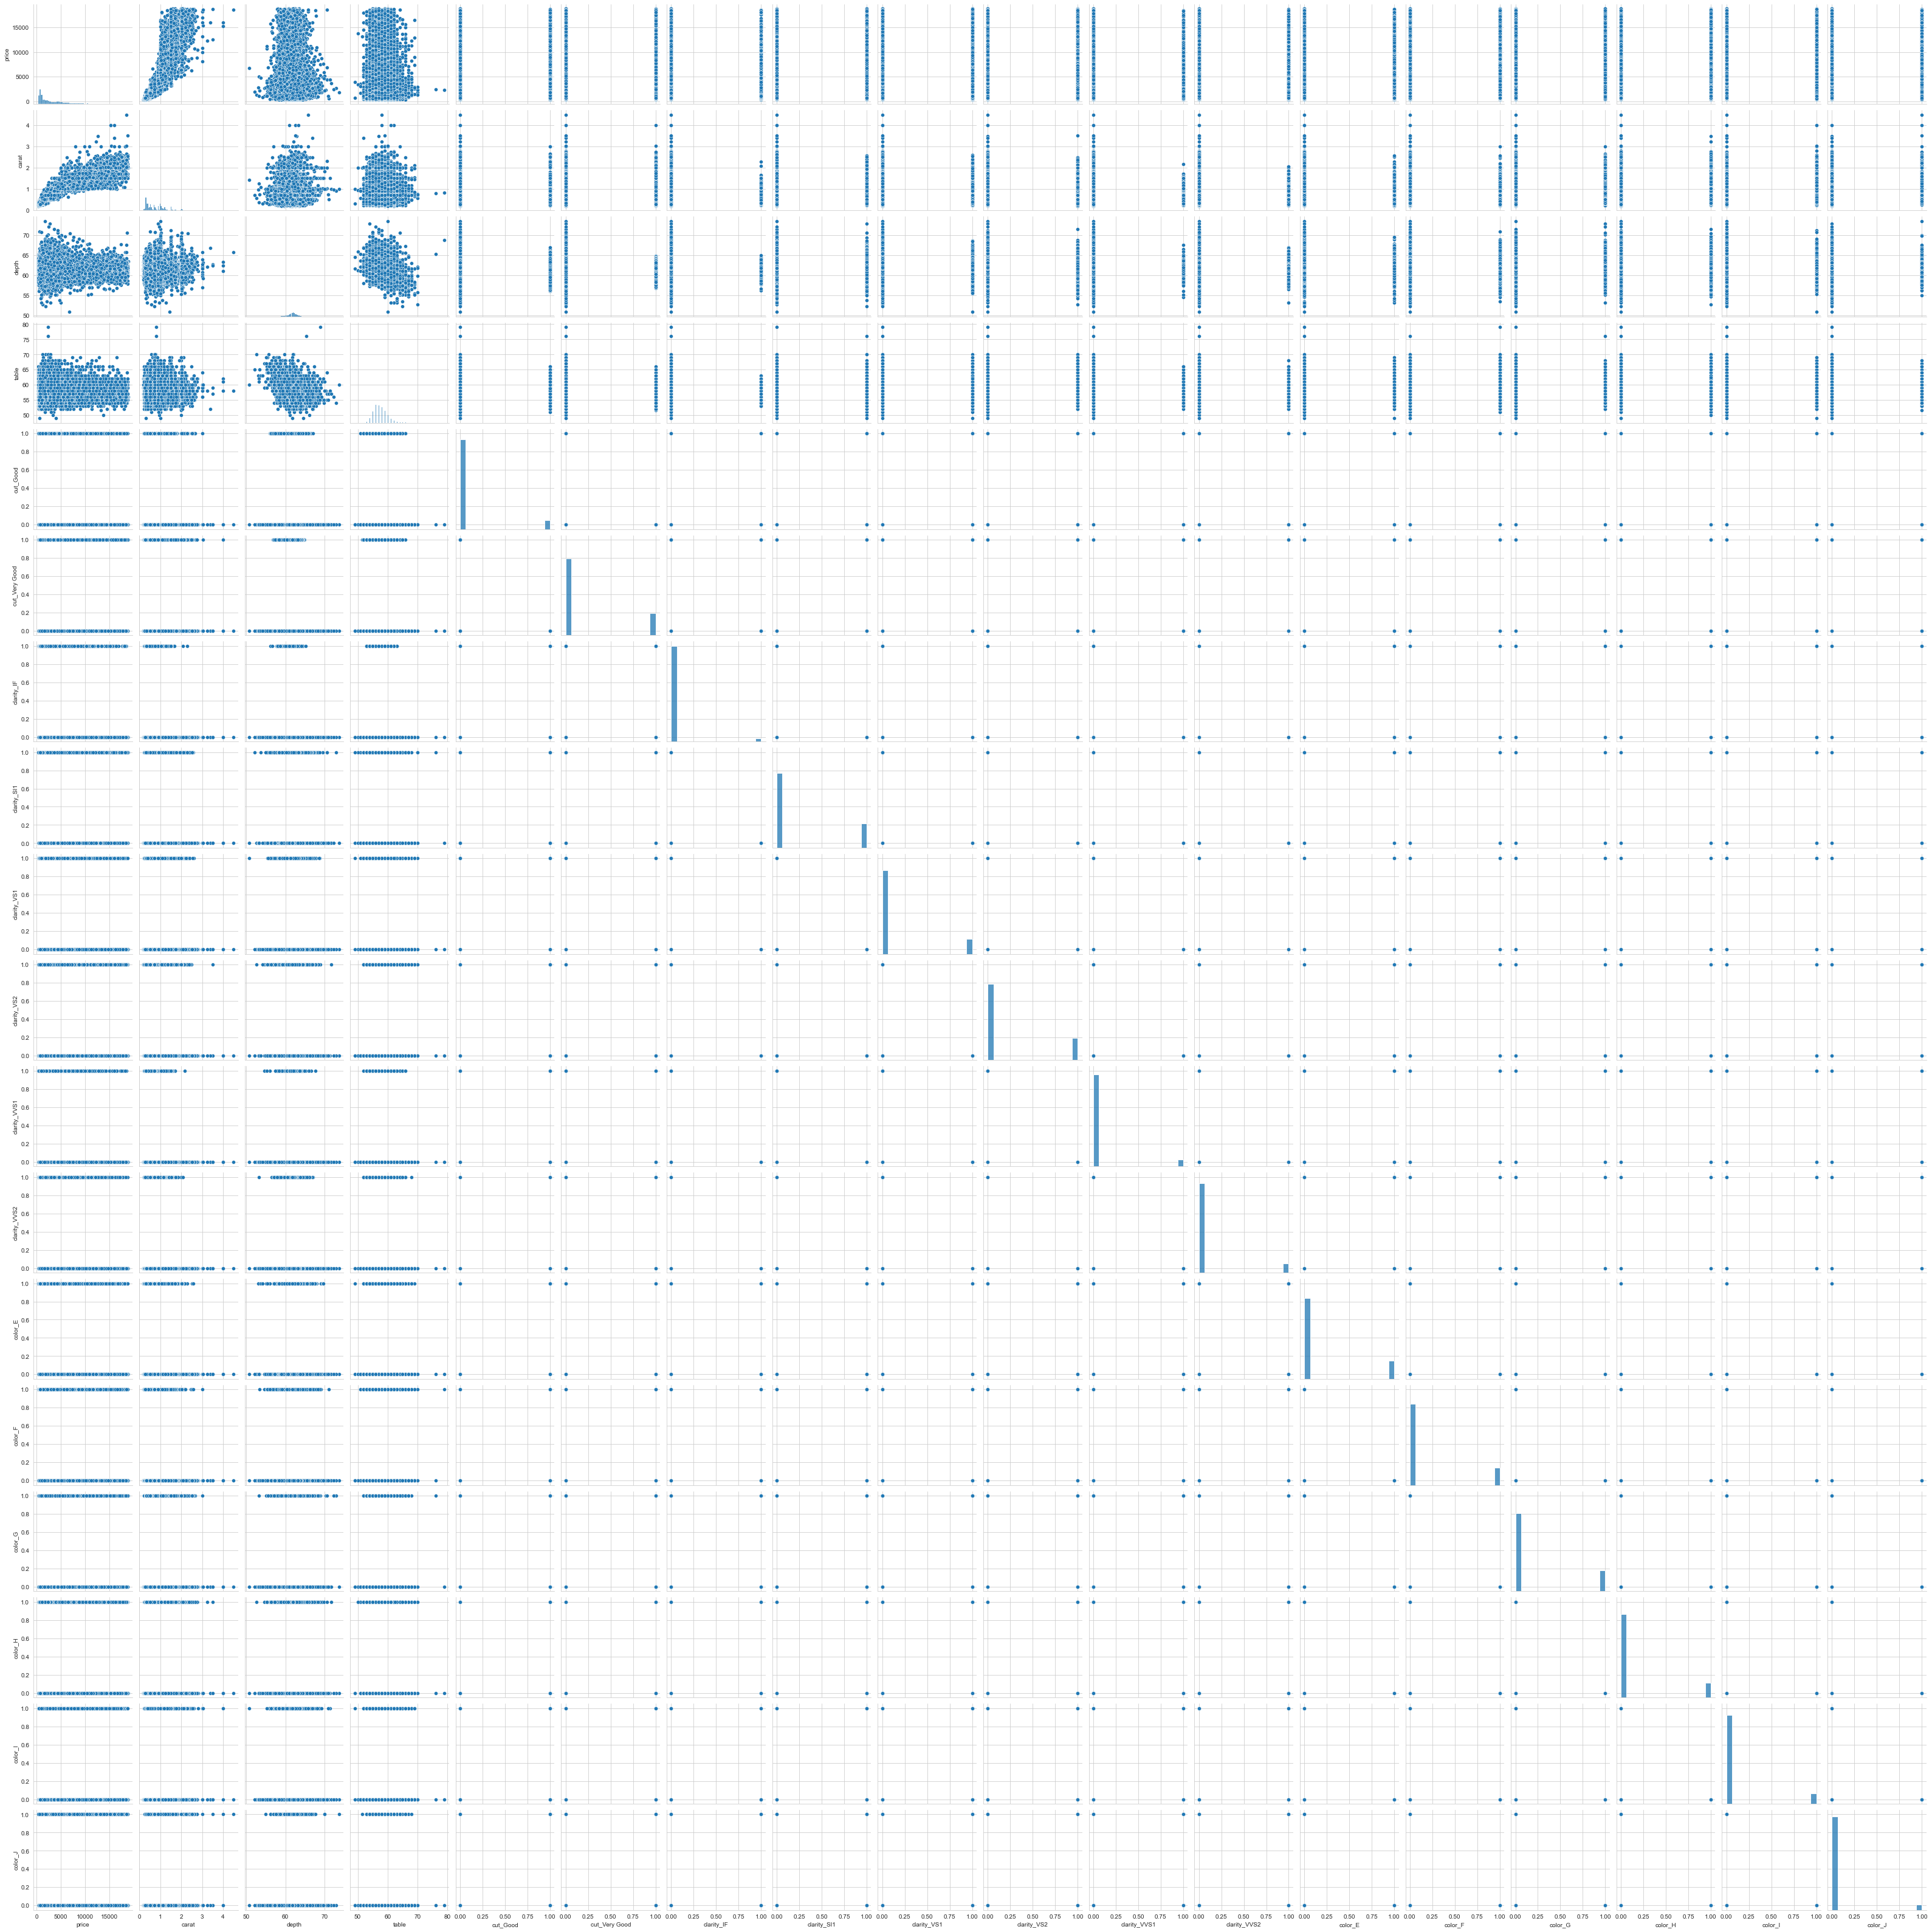

In [54]:
sns.pairplot(df[["price",'carat', 'depth', 'table', 'cut_Good', 'cut_Very Good',
       'clarity_IF', 'clarity_SI1', 'clarity_VS1', 'clarity_VS2',
       'clarity_VVS1', 'clarity_VVS2', 'color_E', 'color_F', 'color_G',
       'color_H', 'color_I', 'color_J']])
plt.show()

In [55]:
# using square transformation
X_train["carat"] = np.square(X_train["carat"])

In [56]:
# using square transformation
X_train["depth"] = np.square(X_train["depth"])

In [57]:
# using square transformation
X_train["table"] = np.square(X_train["table"])

In [58]:
# let's create a model with the transformed data
olsmod_15 = sm.OLS(y_train, X_train)
olsres_15 = olsmod_15.fit()
print(olsres_15.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     5767.
Date:                Sun, 09 Oct 2022   Prob (F-statistic):               0.00
Time:                        23:29:54   Log-Likelihood:            -1.6596e+05
No. Observations:               18853   AIC:                         3.319e+05
Df Residuals:                   18835   BIC:                         3.321e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1723.7985    377.121      4.571

In [59]:
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train.values.flatten()  # actual values
df_pred["Fitted Values"] = olsres_15.fittedvalues.values  # predicted values
df_pred["Residuals"] = olsres_15.resid.values  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
0,537,1128.497356,-591.497356
1,844,1613.239519,-769.239519
2,1240,1628.824595,-388.824595
3,4065,4246.525947,-181.525947
4,4057,3736.593700,320.406300


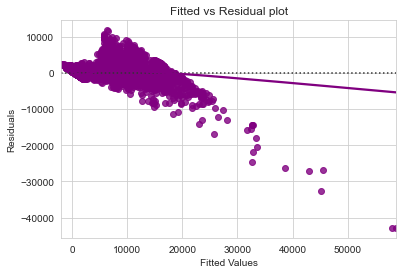

In [60]:
sns.set_style("whitegrid")
sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

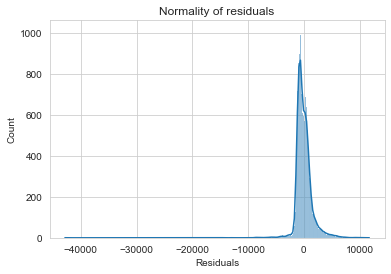

In [61]:
sns.histplot(df_pred["Residuals"], kde=True)
plt.title("Normality of residuals")
plt.show()

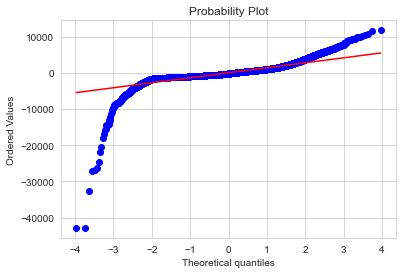

In [62]:
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

In [63]:
stats.shapiro(df_pred["Residuals"])

C:\Users\Honey Sam\anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.7341595888137817, pvalue=0.0)

In [64]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

In [65]:
name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], X_train)
lzip(name, test)

[('F statistic', 0.8658790676424529), ('p-value', 0.9999999999985355)]

Final Model

In [66]:
print(olsres_15.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     5767.
Date:                Sun, 09 Oct 2022   Prob (F-statistic):               0.00
Time:                        23:31:27   Log-Likelihood:            -1.6596e+05
No. Observations:               18853   AIC:                         3.319e+05
Df Residuals:                   18835   BIC:                         3.321e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1723.7985    377.121      4.571

Observations

### Predictions

### Let's print the linear regression equation.

In [67]:
# let's check the model parameters
olsres_15.params

const            1723.798480
carat            3757.114368
depth              -0.450310
table              -0.033071
cut_Good           42.696276
cut_Very Good      90.904041
clarity_IF       2034.644853
clarity_SI1      1062.022995
clarity_VS1      1743.823939
clarity_VS2      1495.973563
clarity_VVS1     1706.985050
clarity_VVS2     1933.601573
color_E          -158.024073
color_F           -87.879595
color_G          -229.804435
color_H          -744.046402
color_I         -1245.073944
color_J         -2177.269441
dtype: float64

In [68]:
Equation = "price ="
print(Equation, end=" ")
for i in range(len(X_train.columns)):
    if i == 0:
        print(olsres_15.params[i], "+", end=" ")
    elif i != len(X_train.columns) - 1:
        print(
            olsres_15.params[i],
            "* (",
            X_train.columns[i],
            ")",
            "+",
            end="  ",
        )
    else:
        print(olsres_15.params[i], "* (", X_train.columns[i], ")")

price = 1723.7984798138332 + 3757.11436842027 * ( carat ) +  -0.45030960705995016 * ( depth ) +  -0.03307144773326496 * ( table ) +  42.69627575218019 * ( cut_Good ) +  90.90404096547167 * ( cut_Very Good ) +  2034.6448527092598 * ( clarity_IF ) +  1062.022994650503 * ( clarity_SI1 ) +  1743.8239391272846 * ( clarity_VS1 ) +  1495.9735633414155 * ( clarity_VS2 ) +  1706.985050341968 * ( clarity_VVS1 ) +  1933.6015730468598 * ( clarity_VVS2 ) +  -158.0240729421719 * ( color_E ) +  -87.87959522125887 * ( color_F ) +  -229.80443502212378 * ( color_G ) +  -744.0464017605341 * ( color_H ) +  -1245.0739443266707 * ( color_I ) +  -2177.2694406808496 * ( color_J )


### We can now use the model for making predictions on the test data.

In [69]:
X_train.columns

Index(['const', 'carat', 'depth', 'table', 'cut_Good', 'cut_Very Good',
       'clarity_IF', 'clarity_SI1', 'clarity_VS1', 'clarity_VS2',
       'clarity_VVS1', 'clarity_VVS2', 'color_E', 'color_F', 'color_G',
       'color_H', 'color_I', 'color_J'],
      dtype='object')

In [70]:
X_test.columns

Index(['const', 'carat', 'depth', 'table', 'x', 'y', 'z', 'cut_Good',
       'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'clarity_IF',
       'clarity_SI1', 'clarity_SI2', 'clarity_VS1', 'clarity_VS2',
       'clarity_VVS1', 'clarity_VVS2', 'color_E', 'color_F', 'color_G',
       'color_H', 'color_I', 'color_J'],
      dtype='object')

In [71]:
X_test2 = X_test.drop(
    ["x", "y", "z", "cut_Ideal", "cut_Premium", "clarity_SI2"], axis=1
)

In [72]:
X_test2["carat"] = np.square(X_test2["carat"])

In [73]:
X_test2["depth"] = np.square(X_test2["depth"])

In [74]:
X_test2["table"] = np.square(X_test2["table"])

In [75]:
# let's make predictions on the test set
y_pred = olsres_15.predict(X_test2)

In [76]:
# let's check the RMSE on the train data
rmse1 = np.sqrt(mean_squared_error(y_train, df_pred["Fitted Values"]))
rmse1

1609.5299850749682

In [77]:
# let's check the RMSE on the test data
rmse2 = np.sqrt(mean_squared_error(y_test, y_pred))
rmse2

1685.3344479890998

In [78]:
# let's check the MAE on the train data
mae1 = mean_absolute_error(y_train, df_pred["Fitted Values"])
mae1

981.6450199536912

In [79]:
# let's check the MAE on the test data
mae2 = mean_absolute_error(y_test, y_pred)
mae2

987.6987126187653